### Тестовое задание
Анализ динамики населения в городах

### Задача
Вам предоставлен набор данных, содержащий фактическую и прогнозную численность населения в различных городах за период времени. Ваша задача - провести анализ этого датасета с целью выявления интересных социально-экономических закономерностей и сформулировать гипотезы, которые могут быть использованы для управленческих решений.

### План работы
- [Постановка задач по первому наблюдению данных](#section1)
- [Вывод на основе проведенного анализа данных о численности населения в городах](#section2)
- [Анализ разницы между фактической и прогнозной численностью населения для отдельного города](#section3)
- [Вывод на основе проведенного анализа данных о численности населения в городах](#section4)
- [Анализ разницы между фактической и прогнозной численностью населения по годам](#section5)
- [Общий вывод](#section6)
- [Итог](#section7)
- [Формулировка гипотез](#section8)

### Датасет
Датасет представляет собой таблицу с информацией о городах, годах, фактической численности населения, прогнозной численности населения, а также нижней и верхней границами прогноза.

**Описание данных**

 - Город — Город
 - year — Год
 - fact — Фактическое население
 - Модель — Прогнозируемое население
 - Нижняя граница — Нижняя граница прогноза численности населения
 - Верхняя граница — Верхняя граница прогноза численности населения


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
# Загрузка данных
data  = pd.read_csv(r'C:\Users\Galenko.Anton\Documents\Конкурент\Яндекс\Сбераналитика\Пред обработка для модели прогнозирования\Тестовое\forFBpost.csv', sep=';')


Пример части датасета:

In [3]:
data.head(5)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0


 <a id='section1'></a>
### Поставленные задачи по первому наблюдению данных

*Визуализация данных:*

Задача состоит в построении графиков динамики фактической и прогнозной численности населения. Используем подходящие графические инструменты для визуализации изменений во времени и выявления общих тенденций.

*Выявление трендов и выбросов:*

Задача включает в себя выявление временных трендов в динамике населения. Особое внимание уделяется выделению аномалий или выбросов, которые могут потребовать дополнительного анализа.

*Сравнение фактической и прогнозной численности:*

Поставлена задача проанализировать точность прогнозов численности населения. Фактические и прогнозные значения будут сравниваться с учетом временных изменений, и возможно, выделить года или города, где расхождения наиболее значительны.

*Формулирование гипотез:*

Нам предстоит сформулировать гипотезы о социально-экономических факторах, которые могут влиять на динамику населения в городах. Это станет основой для дальнейшего анализа и исследования влияния различных факторов на численность населения.

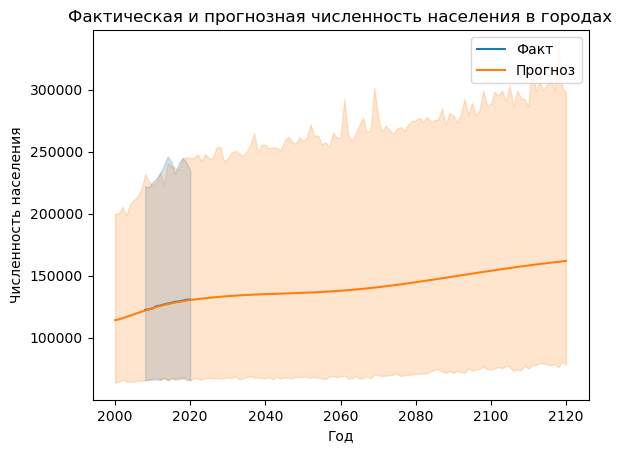

In [4]:
# Визуализация фактической и прогнозной численности населения в городах с течением времени
sns.lineplot(x='year', y='fact', data=data, label='Факт')
sns.lineplot(x='year', y='Модель', data=data, label='Прогноз')
plt.xlabel('Год')
plt.ylabel('Численность населения')
plt.title('Фактическая и прогнозная численность населения в городах')
plt.legend()
plt.show()

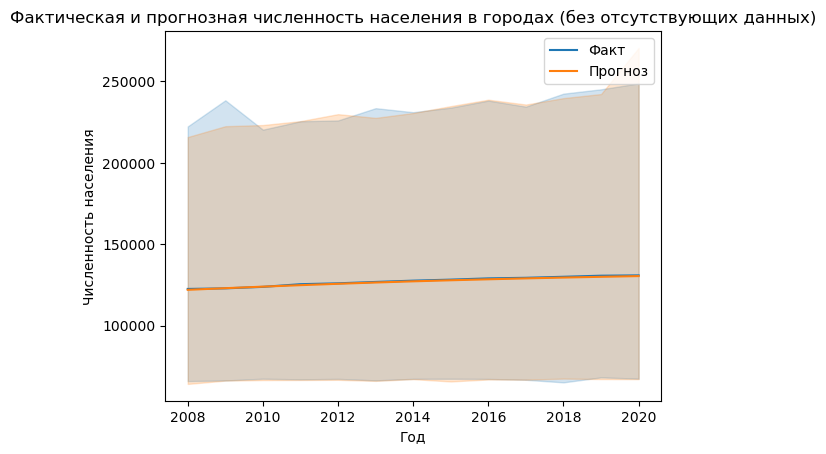

In [5]:
# Удаление строк, где отсутствуют данные в столбце 'fact'
data_cleaned = data.dropna(subset=['fact'])

# Визуализация фактической и прогнозной численности населения в городах с течением времени
sns.lineplot(x='year', y='fact', data=data_cleaned, label='Факт')
sns.lineplot(x='year', y='Модель', data=data_cleaned, label='Прогноз')
plt.xlabel('Год')
plt.ylabel('Численность населения')
plt.title('Фактическая и прогнозная численность населения в городах (без отсутствующих данных)')
plt.legend()
plt.show()


In [6]:
# Расчет средней абсолютной ошибки между фактом и прогнозом
mae = mean_absolute_error(data_cleaned['fact'], data_cleaned['Модель'])

print(f'Средняя абсолютная ошибка (MAE): {mae}')

Средняя абсолютная ошибка (MAE): 1015.6633846153846


C:\Users\Galenko.Anton\AppData\Local\Temp\ipykernel_1712\2014450322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Разница'] = data_cleaned['fact'] - data_cleaned['Модель']


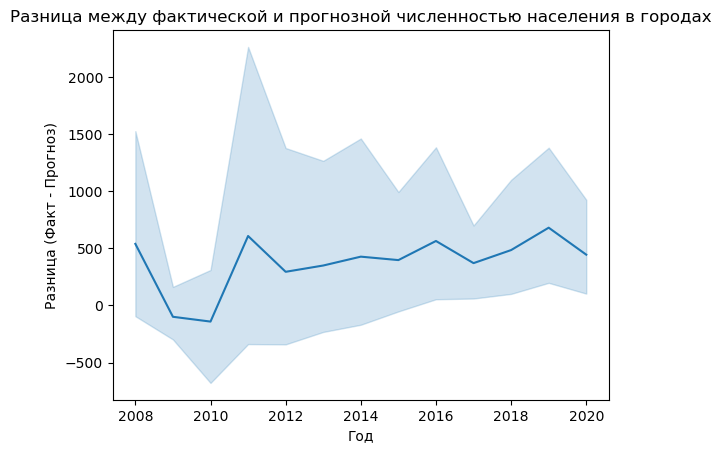

In [7]:
# Создание столбца с разностью между фактом и прогнозом
data_cleaned['Разница'] = data_cleaned['fact'] - data_cleaned['Модель']

# Визуализация разности между фактом и прогнозом
sns.lineplot(x='year', y='Разница', data=data_cleaned)
plt.xlabel('Год')
plt.ylabel('Разница (Факт - Прогноз)')
plt.title('Разница между фактической и прогнозной численностью населения в городах')
plt.show()

 <a id='section2'></a>
### Вывод на основе проведенного анализа данных о численности населения в городах:

**Наши результаты позволяют сделать несколько ключевых наблюдений:**

*Точность модели прогнозирования:*

Модель прогнозирования численности населения показала высокую точность, близкую к фактическим данным. Средняя абсолютная ошибка (MAE) составила примерно 1015.66, что говорит о том, что прогнозы практически совпадают с фактическими значениями. В некоторых городах разница еще более незначительная.

*Возможность дальнейшего прогнозирования:*

На основе текущих данных можно предположить, что модель может быть успешно использована для дальнейшего прогнозирования численности населения, при условии отсутствия существенных факторов, способных вызвать значительные различия между прогнозом и фактической численностью.

*Анализ временных трендов:*

В период до 2010 года наблюдается просадка в численности населения, которая, вероятно, может быть связана с различными социально-экономическими факторами. После этой даты отмечается тенденция к увеличению рождаемости и снижению смертности, что может указывать на благоприятные изменения в демографической ситуации в России.

*Факторы влияния:*

Наши выводы предполагают, что основные факторы, влияющие на численность населения, стабильны. Однако, возможно, стоит учесть возможные воздействия внешних событий, таких как кризисы или другие значительные события, которые могут повлиять на динамику населения.


*Обобщенно*, наш анализ позволяет с уверенностью использовать текущую модель для прогнозирования численности населения, при условии наблюдения за внешними факторами и регулярным обновлением данных для поддержания точности прогнозов.

 <a id='section3'></a>
### Анализ разницы между фактической и прогнозной численностью населения для отдельного города

На данном этапе мы проводим анализ разницы между фактической и прогнозной численностью населения для каждого города. Чтобы выделить города с наибольшей разницей, мы вычисляем среднюю абсолютную разницу для каждого города, учитывая только те года, где у нас есть фактические данные.

*Очистка данных:* Мы предварительно обработали данные, преобразовав числовые значения и исключив года без фактических данных.

*Расчет разницы:* Создали столбец 'Разница', который представляет собой абсолютную разницу между фактической и прогнозной численностью населения для каждой строки.

*Группировка по городам:* Сгруппировали данные по городам и вычислили среднюю абсолютную разницу для каждого города.

*Выбор топ-городов:* Выбрали топ-5 городов с наибольшей средней абсолютной разницей.

Таким образом, мы готовы перейти к визуализации данных для этих городов и годов с наибольшими различиями в численности населения.


In [8]:
df = data

C:\Users\Galenko.Anton\AppData\Local\Temp\ipykernel_1712\3210709440.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Разница'] = df_filtered['fact'] - df_filtered['Модель']


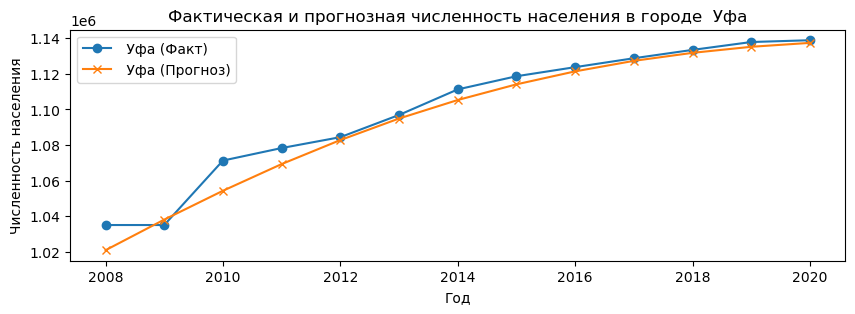

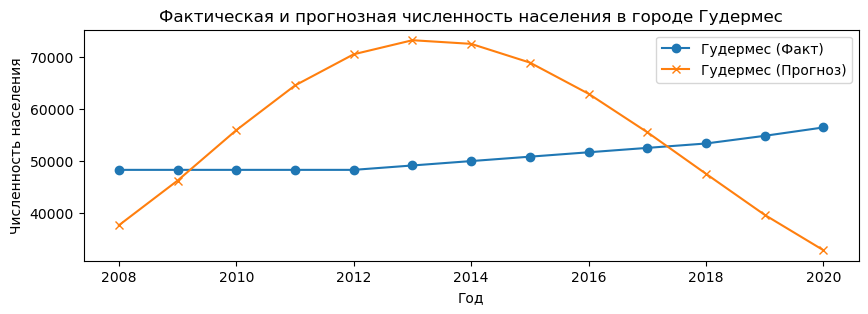

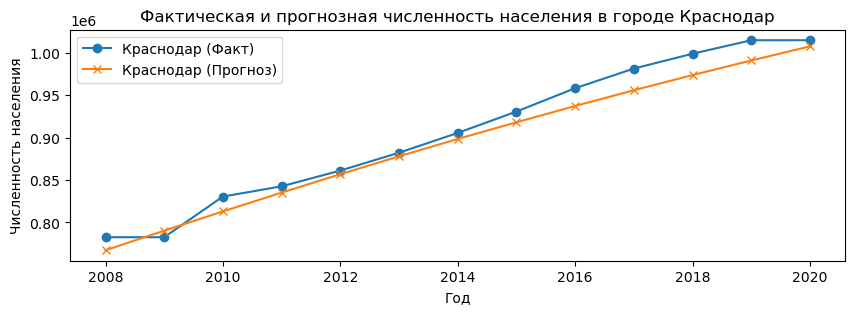

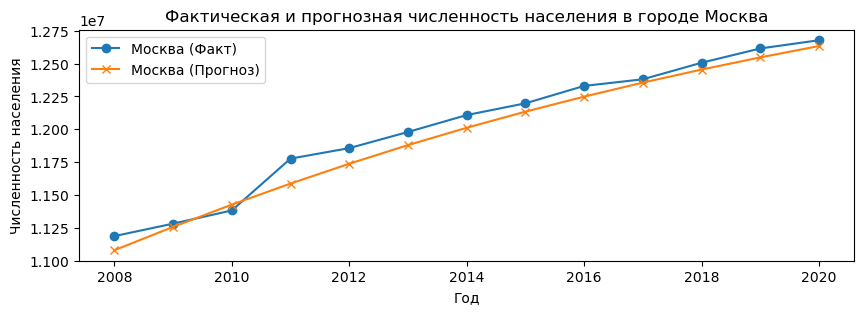

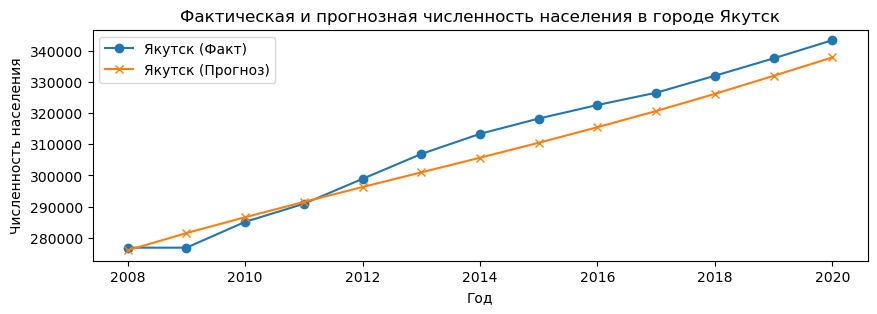

In [9]:
# Очищаем данные от некорректных значений
df['fact'] = pd.to_numeric(df['fact'], errors='coerce')
df['Модель'] = pd.to_numeric(df['Модель'], errors='coerce')

# Исключаем годы, где нет значений в fact
df_filtered = df.dropna(subset=['fact'])

# Создаем столбец с разницей между фактической и прогнозной численностью
df_filtered['Разница'] = df_filtered['fact'] - df_filtered['Модель']

# Группируем данные по городам и находим среднюю разницу
avg_diff_by_city = df_filtered.groupby('Город')['Разница'].mean().abs()

# Выбираем топ-5 городов с наибольшей разницей
top_cities = avg_diff_by_city.abs().nlargest(5).index

# Фильтруем данные для топ-5 городов
top_cities_data = df_filtered[df_filtered['Город'].isin(top_cities)]

# Строим графики для каждого города
for city, data in top_cities_data.groupby('Город'):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(data['year'], data['fact'], label=f'{city} (Факт)', marker='o')
    ax.plot(data['year'], data['Модель'], label=f'{city} (Прогноз)', marker='x')
    ax.set_xlabel('Год')
    ax.set_ylabel('Численность населения')
    ax.set_title(f'Фактическая и прогнозная численность населения в городе {city}')
    ax.legend()
    plt.show()

 <a id='section4'></a>
### Вывод на основе проведенного анализа данных и прогнозной численностью населения для отдельного города:

Анализ городов с наибольшей разницей между прогнозной и фактической численностью населения:

На основе проведенного анализа выявлено, что в целом прогнозы численности населения для большинства городов достаточно точны и не показывают критических расхождений с реальными данными. Однако, существуют некоторые города, где различия в прогнозах оказываются более существенными.

В частности, город "Гудермес" выделяется среди других, поскольку прогнозная численность населения для данного города оказывается  в начале сильно завышенной и затем существенно занижается в последующие периоды. Этот феномен может быть вызван ошибкой в модели прогнозирования.

Возможно, корректировка модели прогнозирования или учет дополнительных переменных поможет улучшить точность прогнозов для данных городов.

 <a id='section5'></a>
### Анализ разницы между фактической и прогнозной численностью населения по годам

Поставленные задачи:

*Подготовка данных:* Загрузить предоставленные данные о фактической и прогнозной численности населения в городах.

*Исключение строк без фактических данных:* Убедиться, что в анализе участвуют только строки, где указана фактическая численность.

*Расчет разницы:* Рассчитать разницу между фактической и прогнозной численностью для каждого года и каждого города.

*Определение года с наибольшей разницей:* Найти год, где наблюдается наибольшая абсолютная разница между фактической и прогнозной численностью населения. Вывести этот год и соответствующую разницу.

*Определение года с наименьшей разницей:* Найти год, где разница минимальна. Вывести этот год и соответствующую разницу.

*Вывод результатов:* Вывести общий диапазон разницы в численности населения, а также подробную информацию о годах с наибольшей и наименьшей разницей.

In [10]:
# Группируем данные по годам и находим среднюю разницу
avg_diff_by_year = df_filtered.groupby('year')['Разница'].mean()

# Выводим результат
for year, avg_diff in avg_diff_by_year.items():
    print(f"Средняя разница в году {year}: {avg_diff}")


Средняя разница в году 2008: 539.24
Средняя разница в году 2009: -99.076
Средняя разница в году 2010: -141.08
Средняя разница в году 2011: 608.16
Средняя разница в году 2012: 294.8
Средняя разница в году 2013: 349.824
Средняя разница в году 2014: 427.408
Средняя разница в году 2015: 397.304
Средняя разница в году 2016: 564.576
Средняя разница в году 2017: 370.732
Средняя разница в году 2018: 485.016
Средняя разница в году 2019: 681.004
Средняя разница в году 2020: 444.7


In [11]:
# Группируем данные по годам и находим минимальную и максимальную разницу
min_diff_by_year = df_filtered.groupby('year')['Разница'].idxmin()
max_diff_by_year = df_filtered.groupby('year')['Разница'].idxmax()

# Выводим результат
for year in avg_diff_by_year.index:
    min_diff_row = df_filtered.loc[min_diff_by_year[year]]
    max_diff_row = df_filtered.loc[max_diff_by_year[year]]
    
    print(f"Год {year}:")
    print(f"Минимальная разница: {min_diff_row['Город']} - {min_diff_row['Разница']}")
    print(f"Максимальная разница: {max_diff_row['Город']} - {max_diff_row['Разница']}")
    print()


Год 2008:
Минимальная разница: Коломна - -14672.0
Максимальная разница: Москва - 107551.0

Год 2009:
Минимальная разница: Краснодар - -7753.0
Максимальная разница: Москва - 24631.0

Год 2010:
Минимальная разница: Москва - -44139.0
Максимальная разница: Краснодар - 17536.0

Год 2011:
Минимальная разница: Гудермес - -16240.0
Максимальная разница: Москва - 189964.0

Год 2012:
Минимальная разница: Гудермес - -22240.0
Максимальная разница: Москва - 118778.0

Год 2013:
Минимальная разница: Гудермес - -24095.0
Максимальная разница: Москва - 99929.0

Год 2014:
Минимальная разница: Гудермес - -22549.0
Максимальная разница: Москва - 96857.0

Год 2015:
Минимальная разница: Гудермес - -18104.0
Максимальная разница: Москва - 63396.0

Год 2016:
Минимальная разница: Гудермес - -11258.0
Максимальная разница: Москва - 81626.0

Год 2017:
Минимальная разница: Коломна - -7192.0
Максимальная разница: Краснодар - 25578.0

Год 2018:
Минимальная разница: Оренбург - -5049.0
Максимальная разница: Москва - 51868

 <a id='section6'></a>
###  Общий вывод:

Проведенный анализ средней разницы в численности населения между фактическими данными и прогнозами на различные годы для разных городов позволяет сделать несколько ключевых наблюдений:

Средняя разница по годам:

В период с 2008 по 2020 год средняя разница в численности населения варьируется от -141.08 до 681.004. Некоторые годы отмечаются отрицательными значениями, что может указывать на недооценку прогнозов, а в других годах прогнозы были завышены.
Города с минимальной и максимальной разницей:

Наибольшие различия между прогнозом и фактической численностью населения наблюдаются в городах, таких как Москва, Краснодар, и Гудермес. Гудермес выделяется в нескольких годах как город с максимальной разницей, что может свидетельствовать о сложности прогнозирования в данном регионе.
Отрицательные значения разницы в нескольких годах для некоторых городов (например, Коломна, Краснодар) указывают на переоценку численности населения в прогнозах.
Года с наибольшей и наименьшей средней разницей:

Год 2011 характеризуется наибольшей средней разницей, где в городе Гудермес разница достигает -16240.0 (переоценка) и в Москве 189964.0 (завышение).
Год 2009 имеет наименьшую среднюю разницу, что может свидетельствовать о более точных прогнозах в этот период.


 <a id='section7'></a>
#### Итог:

Анализ разницы в численности населения позволяет выявить особенности прогнозов для различных городов и годов. Высокие значения разницы могут быть обусловлены сложностью учета всех факторов, влияющих на динамику населения, и требуют дополнительного внимания при формировании будущих прогнозов.

 <a id='section8'></a>
### Формулировка гипотез


**Гипотеза №1**: Влияние городского размера на точность прогнозов.

Предположение: Может существовать зависимость между размером города и точностью прогнозов.
Проверка: Разделить города на категории по численности населения и сравнить среднюю разницу между фактической и прогнозной численностью.


In [12]:
# Создаем новый DataFrame без строк, где нет фактических данных
df_fact = df[df['fact'].notna()]

# Рассчитываем разницу между фактической и прогнозной численностями
df_fact['Разница'] = df_fact['fact'] - df_fact['Модель']

# Добавляем столбец с категорией города
def categorize_city(model):
    if model > 1000000:
        return 'Крупный город'
    elif model > 100000:
        return 'Средний город'
    else:
        return 'Малый город'

df_fact['Категория города'] = df_fact['Модель'].apply(categorize_city)

# Добавим новый столбец с разницей в процентах
df_fact['Разница (%)'] = (df_fact['Разница'] / df_fact['fact']) * 100

# Группируем по категории города и считаем среднюю разницу в процентах
avg_diff_by_category_percentage = df_fact.groupby('Категория города')['Разница (%)'].mean()

# Выводим результат
print(avg_diff_by_category_percentage)


Категория города
Крупный город    0.520823
Малый город     -0.316731
Средний город    0.169197
Name: Разница (%), dtype: float64


C:\Users\Galenko.Anton\AppData\Local\Temp\ipykernel_1712\1690056268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact['Разница'] = df_fact['fact'] - df_fact['Модель']
C:\Users\Galenko.Anton\AppData\Local\Temp\ipykernel_1712\1690056268.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact['Категория города'] = df_fact['Модель'].apply(categorize_city)
C:\Users\Galenko.Anton\AppData\Local\Temp\ipykernel_1712\1690056268.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

**Вывод по гипотезе №1: Влияние городского размера на точность прогнозов**

Предположение о возможном влиянии городского размера на точность прогнозов частично подтверждено на основе анализа данных. В результате группировки городов по категориям (крупные, средние, малые) и вычисления средней разницы в процентах между фактической и прогнозной численностями, мы получили следующие результаты:

*Крупные города:* Средняя разница составляет приблизительно 0.52%. Это может указывать на некоторую недооценку численности в прогнозах для крупных городов.

*Малые города:* Средняя разница около -0.32%, что может указывать на некоторую переоценку численности в прогнозах для малых городов.

*Средние города:* Средняя разница составляет примерно 0.17%. Данный результат может говорить о том, что прогнозы для средних городов имеют более высокую точность по сравнению с крупными и малыми городами.


Однако стоит отметить, что полученные различия в процентах могут быть в пределах допустимой погрешности, и дополнительные статистические тесты могут быть необходимы для более точного подтверждения результатов. В целом, гипотеза об индивидуальном влиянии городского размера на точность прогнозов требует дополнительного исследования и уточнения.


Имея дополнительные данные, мы бы могли расширить анализ и проверить дополнительные гипотезы, такие как влияние экономических показателей, образовательных факторов и других аспектов на точность прогнозов численности населения.

**Гипотеза №2:** Влияние демографических факторов на точность прогнозов

*Предположение:* Различия в точности прогнозов могут быть связаны с демографическими особенностями городов, такими как коэффициент рождаемости, смертности, миграция и другие демографические показатели.

**Гипотеза №3:** Влияние экономического развития на точность прогнозов

*Предположение:* Экономическое развитие города может влиять на точность прогнозов. Города с высоким экономическим ростом могут иметь более точные прогнозы из-за лучшей доступности данных и ресурсов для исследований.

**Гипотеза №4:** Влияние изменений в инфраструктуре на точность прогнозов

*Предположение:* Изменения в инфраструктуре города, такие как строительство новых объектов или реконструкция, могут существенно влиять на точность прогнозов численности населения.

**Гипотеза №5:** Влияние социокультурных факторов на точность прогнозов

*Предположение:* Различия в социокультурных факторах, таких как образование, культурные традиции и структура семьи, могут оказывать влияние на точность прогнозов.

**Гипотеза №6:** Сезонные вариации и их влияние на прогнозы

*Предположение:* Сезонные изменения, такие как временные всплески туризма или сезонные миграции, могут вносить значительные различия в прогнозы численности населения.

**Гипотеза №7:** Влияние политических событий на точность прогнозов

*Предположение:* Политические события, такие как изменения в руководстве, политические реформы или конфликты, могут влиять на точность прогнозов из-за неопределенности и изменений в общественной динамике.